In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Library

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score
from sklearn.preprocessing import MinMaxScaler
from kmodes.kprototypes import KPrototypes
from sklearn.cluster import KMeans
warnings.filterwarnings("ignore")

# Data Loading

In [7]:
df = pd.read_csv('/content/drive/MyDrive/Dimas Ananda, S.Stat/Online Courses & Others/Bangkit 2021/Capstone Project/CAP0025_Dataset.csv')

In [8]:
df

,no,name,ingredients,diet,cook_time,flavor_profile,course,diabetic,halal,calories
0,1,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,25,sweet,dessert,1,1,93.0
1,2,Boondi,"Gram flour, ghee, sugar",vegetarian,30,sweet,dessert,1,1,69.0
2,3,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,60,sweet,dessert,1,1,386.0
3,4,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,30,sweet,dessert,1,1,74.0
4,5,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,40,sweet,dessert,1,1,204.0
...,...,...,...,...,...,...,...,...,...,...
250,251,Til Pitha,"Glutinous rice, black sesame seeds, gur",vegetarian,30,sweet,dessert,1,1,240.0
251,252,Bebinca,"Coconut milk, egg yolks, clarified butter, all...",vegetarian,60,sweet,dessert,1,1,993.0
252,253,Shufta,"Cottage cheese, dry dates, dried rose petals, ...",vegetarian,-1,sweet,dessert,0,1,824.0
253,254,Mawa Bati,"Milk powder, dry fruits, arrowroot powder, all...",vegetarian,45,sweet,dessert,0,1,242.0


# EDA

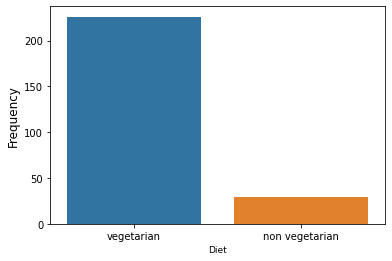

In [9]:
sns.countplot(df["diet"],label='count') #.set_xticklabels(['2011','2012','2013','2014','2015','2016','2017','2018'])
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Diet', fontsize=9)
plt.show()

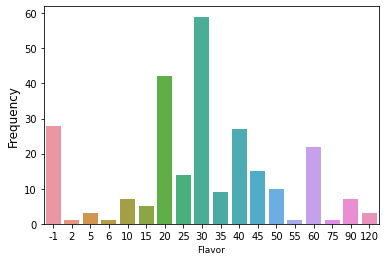

In [10]:
sns.countplot(df["cook_time"],label='count') #.set_xticklabels(['2011','2012','2013','2014','2015','2016','2017','2018'])
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Flavor', fontsize=9)
plt.show()

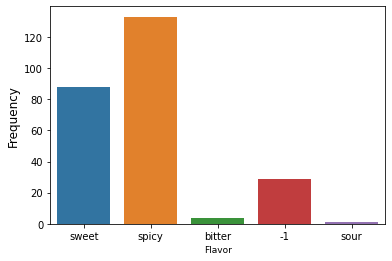

In [11]:
sns.countplot(df["flavor_profile"],label='count') #.set_xticklabels(['2011','2012','2013','2014','2015','2016','2017','2018'])
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Flavor', fontsize=9)
plt.show()

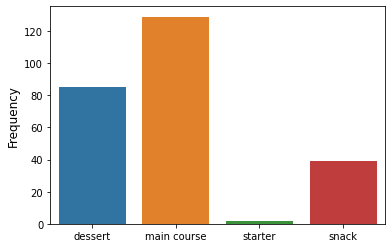

In [12]:
sns.countplot(df["course"],label='count') #.set_xticklabels(['2011','2012','2013','2014','2015','2016','2017','2018'])
plt.ylabel('Frequency', fontsize=12)
plt.xlabel("")
plt.show()

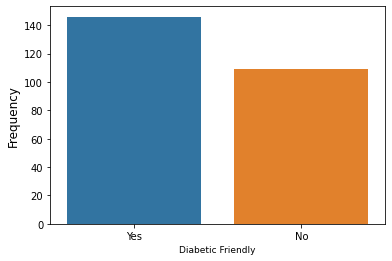

In [13]:
sns.countplot(df["diabetic"],label='count').set_xticklabels(['Yes','No'])
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Diabetic Friendly', fontsize=9)
plt.show()

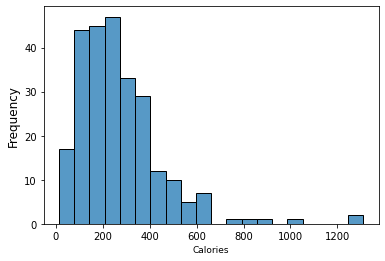

In [14]:
sns.histplot(df["calories"],label='count')
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Calories', fontsize=9)
plt.show()

# Preprocessing

In [15]:
df["flavor_profile"]=df["flavor_profile"].replace("-1","spicy")
df["cook_time"]=df["cook_time"].replace(-1,df["cook_time"].mean())

In [16]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['diet_label'] = labelencoder.fit_transform(df['diet'])
df['flavor_profile_label'] = labelencoder.fit_transform(df['flavor_profile'])
df['course_label'] = labelencoder.fit_transform(df['course'])
df
#df["course"].value_counts()

,no,name,ingredients,diet,cook_time,flavor_profile,course,diabetic,halal,calories,diet_label,flavor_profile_label,course_label
0,1,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,25.000000,sweet,dessert,1,1,93.0,1,3,0
1,2,Boondi,"Gram flour, ghee, sugar",vegetarian,30.000000,sweet,dessert,1,1,69.0,1,3,0
2,3,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,60.000000,sweet,dessert,1,1,386.0,1,3,0
3,4,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,30.000000,sweet,dessert,1,1,74.0,1,3,0
4,5,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,40.000000,sweet,dessert,1,1,204.0,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,251,Til Pitha,"Glutinous rice, black sesame seeds, gur",vegetarian,30.000000,sweet,dessert,1,1,240.0,1,3,0
251,252,Bebinca,"Coconut milk, egg yolks, clarified butter, all...",vegetarian,60.000000,sweet,dessert,1,1,993.0,1,3,0
252,253,Shufta,"Cottage cheese, dry dates, dried rose petals, ...",vegetarian,31.803922,sweet,dessert,0,1,824.0,1,3,0
253,254,Mawa Bati,"Milk powder, dry fruits, arrowroot powder, all...",vegetarian,45.000000,sweet,dessert,0,1,242.0,1,3,0


In [17]:
data = df[['name','ingredients', 'cook_time','calories','diabetic','diet_label','flavor_profile_label','course_label']]

In [18]:
from sklearn.preprocessing import MinMaxScaler
columns_to_normalize = ['cook_time','calories']
scaler = MinMaxScaler().fit(data[columns_to_normalize])
data[columns_to_normalize] = pd.DataFrame(scaler.transform(data[columns_to_normalize]))

In [19]:
data

,name,ingredients,cook_time,calories,diabetic,diet_label,flavor_profile_label,course_label
0,Balu shahi,"Maida flour, yogurt, oil, sugar",0.194915,0.061633,1,1,3,0
1,Boondi,"Gram flour, ghee, sugar",0.237288,0.043143,1,1,3,0
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",0.491525,0.287365,1,1,3,0
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",0.237288,0.046995,1,1,3,0
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",0.322034,0.147149,1,1,3,0
...,...,...,...,...,...,...,...,...
250,Til Pitha,"Glutinous rice, black sesame seeds, gur",0.237288,0.174884,1,1,3,0
251,Bebinca,"Coconut milk, egg yolks, clarified butter, all...",0.491525,0.755008,1,1,3,0
252,Shufta,"Cottage cheese, dry dates, dried rose petals, ...",0.252576,0.624807,0,1,3,0
253,Mawa Bati,"Milk powder, dry fruits, arrowroot powder, all...",0.364407,0.176425,0,1,3,0


In [20]:
x_scaled = data.iloc[:, 2:].values

In [21]:
x_scaled 

array([[0.19491525, 0.06163328, 1.        , 1.        , 3.        ,
        0.        ],
       [0.23728814, 0.0431433 , 1.        , 1.        , 3.        ,
        0.        ],
       [0.49152542, 0.28736518, 1.        , 1.        , 3.        ,
        0.        ],
       ...,
       [0.25257561, 0.6248074 , 0.        , 1.        , 3.        ,
        0.        ],
       [0.36440678, 0.17642527, 0.        , 1.        , 3.        ,
        0.        ],
       [0.25257561, 0.09175655, 1.        , 1.        , 3.        ,
        0.        ]])

# Clustering Model

In [22]:
cost=[]
for i in range(2,20):
    kproto = KPrototypes(n_clusters=i, init='Cao')
    kproto.fit_predict(x_scaled, categorical=[2,3,4,5])
    cost.append(kproto.cost_)

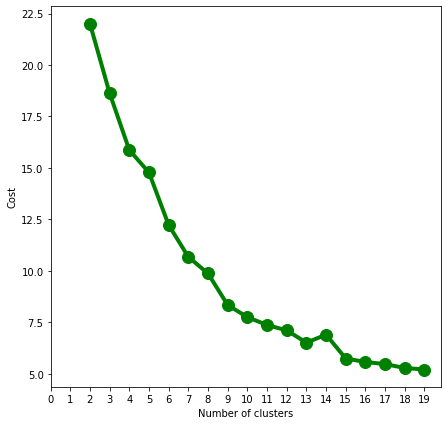

In [23]:
fig = plt.figure(figsize = (7,7))
plt.plot(range(2,20),cost, linewidth=4, markersize=12,marker='o',color = 'green')
plt.xticks(np.arange(20))
plt.xlabel("Number of clusters")
plt.ylabel("Cost")
plt.show()

In [24]:
kproto = KPrototypes(n_clusters=20, init='Cao', random_state=42)
clusters= kproto.fit_predict(x_scaled, categorical=[2,3,4,5])

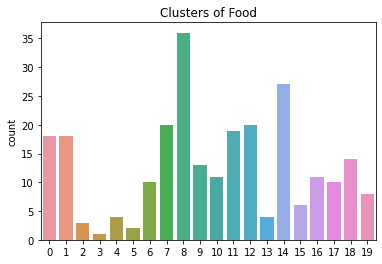

In [25]:
sns.countplot(clusters)
plt.title('Clusters of Food')
plt.show()

In [26]:
data.insert(loc=0, column='cluster', value=clusters)

In [27]:
data

,cluster,name,ingredients,cook_time,calories,diabetic,diet_label,flavor_profile_label,course_label
0,14,Balu shahi,"Maida flour, yogurt, oil, sugar",0.194915,0.061633,1,1,3,0
1,14,Boondi,"Gram flour, ghee, sugar",0.237288,0.043143,1,1,3,0
2,1,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",0.491525,0.287365,1,1,3,0
3,14,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",0.237288,0.046995,1,1,3,0
4,14,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",0.322034,0.147149,1,1,3,0
...,...,...,...,...,...,...,...,...,...
250,14,Til Pitha,"Glutinous rice, black sesame seeds, gur",0.237288,0.174884,1,1,3,0
251,15,Bebinca,"Coconut milk, egg yolks, clarified butter, all...",0.491525,0.755008,1,1,3,0
252,15,Shufta,"Cottage cheese, dry dates, dried rose petals, ...",0.252576,0.624807,0,1,3,0
253,17,Mawa Bati,"Milk powder, dry fruits, arrowroot powder, all...",0.364407,0.176425,0,1,3,0


In [28]:
df.insert(loc=0, column='cluster', value=clusters)

In [29]:
df

,cluster,no,name,ingredients,diet,cook_time,flavor_profile,course,diabetic,halal,calories,diet_label,flavor_profile_label,course_label
0,14,1,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,25.000000,sweet,dessert,1,1,93.0,1,3,0
1,14,2,Boondi,"Gram flour, ghee, sugar",vegetarian,30.000000,sweet,dessert,1,1,69.0,1,3,0
2,1,3,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,60.000000,sweet,dessert,1,1,386.0,1,3,0
3,14,4,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,30.000000,sweet,dessert,1,1,74.0,1,3,0
4,14,5,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,40.000000,sweet,dessert,1,1,204.0,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,14,251,Til Pitha,"Glutinous rice, black sesame seeds, gur",vegetarian,30.000000,sweet,dessert,1,1,240.0,1,3,0
251,15,252,Bebinca,"Coconut milk, egg yolks, clarified butter, all...",vegetarian,60.000000,sweet,dessert,1,1,993.0,1,3,0
252,15,253,Shufta,"Cottage cheese, dry dates, dried rose petals, ...",vegetarian,31.803922,sweet,dessert,0,1,824.0,1,3,0
253,17,254,Mawa Bati,"Milk powder, dry fruits, arrowroot powder, all...",vegetarian,45.000000,sweet,dessert,0,1,242.0,1,3,0


# Classification Model

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X = data.iloc[:,3:].values
y= data['cluster'].values

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print('Total Rows Data X Training',X_train.shape[0])
print('Total Rows Data X Testing',X_test.shape[0])
print('Total Rows Data y Training',y_train.shape[0])
print('Total Rows Data y Testing',y_test.shape[0])

Total Rows Data X Training 204
Total Rows Data X Testing 51
Total Rows Data y Training 204
Total Rows Data y Testing 51


In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
model=knn.fit(X_train,y_train)
y_pred = model.predict(X_test)
cr = classification_report(y_test, y_pred)
print(cr)
print('Akurasi Model :', accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      0.80      0.89         5
           2       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         2
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         3
           8       0.89      1.00      0.94         8
           9       0.80      1.00      0.89         4
          10       1.00      0.50      0.67         4
          11       0.75      1.00      0.86         3
          12       1.00      1.00      1.00         1
          13       0.00      0.00      0.00         2
          14       0.83      1.00      0.91         5
          16       1.00      1.00      1.00         2
          17       0.00      0.00      0.00         0
          18       1.00      1.00      1.00         3

    accuracy              

In [34]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
model2= forest.fit(X_train,y_train)
y_pred2 = model2.predict(X_test)
cr2 = classification_report(y_test, y_pred2)
print(cr2)
print('Akurasi Model :', accuracy_score(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      1.00      1.00         5
           2       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         2
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         3
           8       0.89      1.00      0.94         8
           9       0.80      1.00      0.89         4
          10       1.00      1.00      1.00         4
          11       1.00      0.67      0.80         3
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         5
          16       1.00      1.00      1.00         2
          18       1.00      1.00      1.00         3
          19       0.00      0.00      0.00         0

    accuracy                           0.92        51
   macro avg       0.78   

In [35]:
from sklearn.svm import SVC
svc = SVC()
model3=svc.fit(X_train,y_train)
y_pred3 = model3.predict(X_test)
cr3 = classification_report(y_test, y_pred3)
print(cr3)
print('Akurasi Model :', accuracy_score(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.33      0.17      0.22         6
           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         2
           7       1.00      1.00      1.00         3
           8       0.47      1.00      0.64         8
           9       0.67      1.00      0.80         4
          10       0.00      0.00      0.00         4
          11       0.00      0.00      0.00         3
          12       1.00      1.00      1.00         1
          13       0.00      0.00      0.00         2
          14       0.38      1.00      0.56         5
          16       1.00      1.00      1.00         2
          17       0.00      0.00      0.00         0
          18       0.00      0.00      0.00         3

    accuracy              

In [36]:
#Cross Validation
scores = cross_val_score(forest, X_train, y_train, cv=5)
cross_validation=pd.DataFrame(scores, columns=['cross_validation'])
print (cross_validation)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

   cross_validation
0          0.926829
1          0.951220
2          0.902439
3          0.951220
4          0.925000
0.93 accuracy with a standard deviation of 0.02


#### Classification with TensorFlow

In [37]:
import tensorflow as tf

modeltf = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation=tf.nn.relu, 
                          input_shape=(6,)),
    tf.keras.layers.Dense(32, activation=tf.nn.relu),
    tf.keras.layers.Dense(16, activation=tf.nn.relu),
    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

modeltf.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                448       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 3,073
Trainable params: 3,073
Non-trainable params: 0
_________________________________________________________________


In [38]:
modeltf.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [39]:
history = modeltf.fit(X_train, y_train, epochs=500, verbose=0)

history.history['accuracy'][-1]

0.06372549384832382

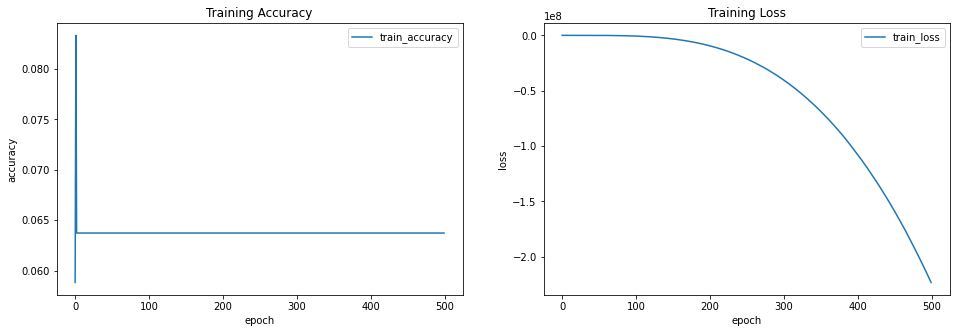

In [40]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.title('Training Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy'], loc='best')
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.title('Training Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss'], loc='best')

In [41]:
y_predtf = modeltf.predict(X_test)
print('Akurasi Model :', accuracy_score(y_test, y_predtf))

Akurasi Model : 0.09803921568627451


# Predict New Data (Recommendation)

vegetarian=1
non vegetarian=0

bitter=0
sour=1
spicy=2
sweet=3

dessert=0
main course=1
snack=2
starter=3

Diabetic Friendly
yes = 0
no = 1

halal
no = 0
yes = 1


In [42]:
country = input("Country? *India available ")
new_cook = input("Cooking Time(Minutes)? ")
new_calories =input("Calories(Kcal)? ")
new_diabetes =input("Diabetic Friendly? \n(0) Yes \n(1) No \n Please Select by Number: ")
new_diet =input("Diet? \n(0) Non Vegetarian \n(1) Vegetarian \n Please Select by Number: ")
new_flavor=input("Flavor? \n(0) Bitter \n(1) Sour \n(2) Spicy \n(3) Sweet \n Please Select by Number: ")
new_course=input("(0) Dessert \n(1) Main Course \n(2) Snack \n(3) Starter \n Please Select by Number: ")
print("Thank You!")

Country? *India available India
Cooking Time(Minutes)? 350
Calories(Kcal)? 122
Diabetic Friendly? 
(0) Yes 
(1) No 
 Please Select by Number: 0
Diet? 
(0) Non Vegetarian 
(1) Vegetarian 
 Please Select by Number: 0
Flavor? 
(0) Bitter 
(1) Sour 
(2) Spicy 
(3) Sweet 
 Please Select by Number: 0
(0) Dessert 
(1) Main Course 
(2) Snack 
(3) Starter 
 Please Select by Number: 2
Thank You!


In [43]:
new_df = {'new_cook': [int(new_cook)],
        'new_calories': [int(new_calories)],
        'new_diabetes': [int(new_diabetes)],
        'new_diet':[int(new_diet)],
        'new_flavor' : [int(new_flavor)],
        'new_course': [int(new_course)]}
new_df = pd.DataFrame(new_df)
newcolumns_to_normalize = ['new_cook','new_calories']
new_df[newcolumns_to_normalize] = pd.DataFrame(scaler.transform(new_df[newcolumns_to_normalize]))
X_new = new_df.values
y_new = model2.predict(X_new)
r= data.loc[data["cluster"]==int(y_new)]
recommendation = r.iloc[:,1:3].reset_index(drop=True)
recommendation

,name,ingredients
0,Maach Jhol,"Fish, potol, tomato, chillies, ginger, garlic"
1,Pork Bharta,"Boiled pork, onions, chillies, ginger and garlic"
2,Galho,"Rice, axone, salt, water, chillies, pork"
3,Chicken razala,"Chicken, dahi, sesame seeds, garam masala powd..."
4,Tandoori Chicken,"Greek yogurt, garam masala, kasuri methi, mari..."
5,Tandoori Fish Tikka,"Chickpea flour, biryani masala powder, yogurt,..."
6,Beef Fry,"Beef, coconut, garam masala, curry leaves, gre..."
7,Chicken Varuval,"Meat curry powder, chicken chunks, ginger, tom..."
8,Kolim Jawla,"Baingan, fish, coconut oil, fresh coconut, ginger"
9,Vindaloo,"Chicken, coconut oil, wine vinegar, ginger, gr..."


In [45]:
#Check Data
#df.loc[df["cluster"]==int(y_new)]
#data.loc[data["flavor_profile_label"]==1]
#data["flavor_profile_label"].value_counts()